In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
%matplotlib inline

In [3]:
!ls -l modificados/

total 736
-rwxr-xr-x 1 gabo gabo 226245 Jun 17 22:07 2017_2T.csv
-rwxr-xr-x 1 gabo gabo 296958 Jun 17 20:56 2018_1T.csv
-rwxr-xr-x 1 gabo gabo 221334 Jun 17 20:56 2018_2T.csv


In [4]:
dfs = [pd.read_csv(filename, sep=";") for filename in glob.glob("modificados/*")]

In [4]:
carreras = pd.read_csv("carreras_full.csv")

In [15]:
carreras.tail()

,cod_carrera,carrera
50,IN-ACP,Ingeniería en Auditoría y Contaduría
51,LI-NUT,Nutrición y Dietética
52,LI-RED,Licenciatura en Redes y Sistemas Operativos
53,TE-TMT,Tecnología en Mecatrónica
54,IN-INI,Ingeniería en Negocios Internacionales


In [21]:
def cod_to_carrera(x):
    carrera = carreras[carreras.cod_carrera == x["cod_carrera"]]
    if len(carrera) != 0:
        return carrera.iloc[0, 1]
    #elif x["paralelo"] in (11, 14):
    #    return x["cod_carrera"]
    else:
        return "UNK"

In [22]:
df = dfs[2]
df["carrera"] = df.apply(cod_to_carrera, axis=1)
df[df["carrera"] == "UNK"]

,nombre,matricula,genero,paralelo,cod_carrera,veces_tomadas,1er_proyecto,1er_sustent,1er_lecciones,1er_calif_final,...,3er_exam_tema2,3er_exam_tema3,retirado,examen1,examen2,examen3,final_sin_mejoramiento,final,AP,carrera


In [25]:
df = dfs[2]
df[df["carrera"]=="UNK"]

,nombre,matricula,genero,paralelo,cod_carrera,veces_tomadas,1er_proyecto,1er_sustent,1er_lecciones,1er_calif_final,...,3er_exam_tema2,3er_exam_tema3,retirado,examen1,examen2,examen3,final_sin_mejoramiento,final,AP,carrera


In [26]:
[dfs[i].to_csv(filename, sep=";", index=False) for i,filename in enumerate(glob.glob("modificados/*"))]

[None, None, None]

In [38]:
df = dfs[2]
df[df.nombre.str.contains("MEDINA")]

,nombre,matricula,genero,paralelo,cod_carrera,veces_tomadas,1er_proyecto,1er_sustent,1er_lecciones,1er_calif_final,...,3er_exam_tema2,3er_exam_tema3,retirado,examen1,examen2,examen3,final_sin_mejoramiento,final,AP,carrera
18,"DAVILA MEDINA,HUGO DANIEL",201801909,M,1,CI-013,1,14.00,0.6,6.600000,71.0,...,47.0,5.0,False,73.5,44.0,69.0,68.8,75.6,True,Computación
278,"CUEVA MEDINA,JENNIFER NICOLE",201713187,F,9,CI-005,1,6.80,0.4,5.500000,47.0,...,17.0,2.0,False,51.0,34.0,25.0,48.0,48.0,False,Ingeniería Civil
381,PAZMIÑO MEDINA MIGUEL ANGEL,201419910,M,24,LI-008,2,17.50,1.0,6.666667,62.0,...,NaN,NaN,False,51.0,37.0,NaN,57.8,57.8,False,Nutrición y Dietética
811,"ALVARADO MEDINA,DARWIN ANTHONY",201802410,M,2,CI-007,2,6.08,0.8,9.000000,62.0,...,0.0,0.0,False,65.0,37.5,0.0,62.0,62.0,True,Mecánica


### Promedios por carrera

In [61]:
df = dfs[2]

In [62]:
df.isnull().sum()

nombre                      0
matricula                   0
genero                      0
paralelo                    0
cod_carrera                 0
veces_tomadas               0
1er_proyecto                1
1er_sustent                 1
1er_lecciones               0
1er_calif_final             0
1er_exam_tema1              8
1er_exam_tema2              8
1er_exam_tema3              8
2do_proyecto                1
2do_sustent                 1
2do_lecciones               1
2do_calif_final             0
2do_exam_tema1             32
2do_exam_tema2             33
2do_exam_tema3             32
2do_exam_tema4             32
2do_exam_tema5             32
2do_exam_tema6             32
2do_exam_tema7             32
2do_exam_tema8             32
2do_exam_tema9             32
2do_exam_tema10            32
calif_final_practica        0
3er_proyecto              265
3er_calif_final             0
3er_exam_tema1            233
3er_exam_tema2            233
3er_exam_tema3            233
retirado  

In [63]:
promedios_carrera = df.groupby(["carrera"])["final"].mean()
promedios_carrera.sort_values(ascending=False)

carrera
Matemática                                74.250000
Computación                               73.675000
Mecatrónica                               70.807843
Ingeniería Industrial                     67.490476
Materiales                                67.300000
Alimentos                                 63.450000
Ingeniería Civil                          63.394030
Ingeniería Química                        63.226087
Ingeniería Naval                          62.509091
Biología                                  61.933333
Telecomunicaciones                        60.950051
Electrónica y Automatización              60.525091
Acuicultura                               60.366667
Auditoría y Control de Gestión            60.135849
Economía                                  59.363218
Mecánica                                  58.804444
Ingeniería en Auditoría y Contaduría      58.700000
Logistica y Transporte                    58.400000
Arqueología                               58.120000
Tele

In [13]:
carrera_counts = df.carrera.value_counts()
carrera_counts["Economía"]

84

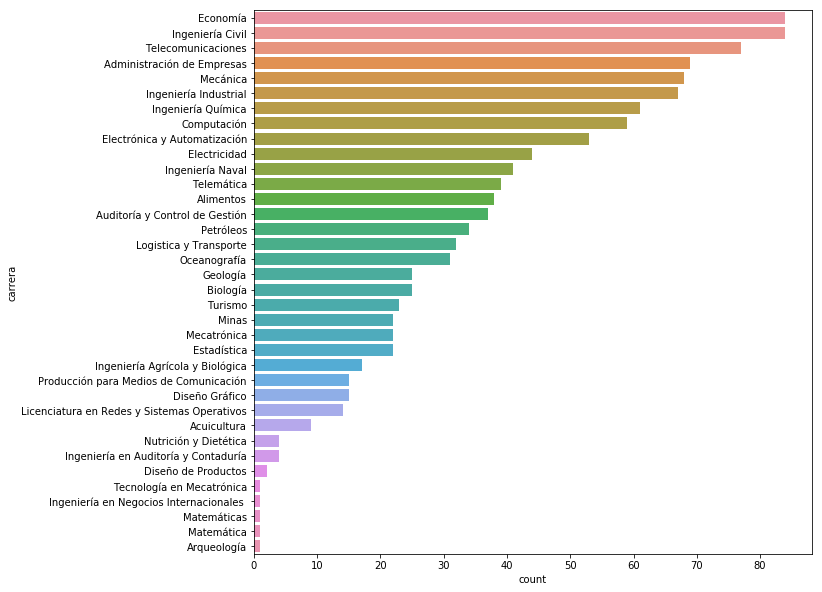

In [8]:
plt.figure(figsize=(10,10))
carrera_plot = sns.countplot(y="carrera", data=df, order=df.carrera.value_counts().index)
#mes_plot = sns.countplot(y="Mes", data=df, order=df.Mes.value_counts().index)


In [14]:
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [29]:
df = dfs[1]
semestre = "2018-1T"

def prom_carrera(df, semestre):
    carrera_counts = df.carrera.value_counts()
    promedios_carrera = df.groupby(["carrera"])["final"].mean()
    promedios_carrera = promedios_carrera.sort_values()
    plt.figure(figsize=(10,15))
    #print(promedios_carrera.index)
    #new_ticks = [f"{carrera} ({carrera_counts[carrera]})" for carrera in promedios_carrera.index]
    value_counts = [carrera_counts[carrera] for carrera in promedios_carrera.index]
    #promedios_carrera.index = new_ticks
    #print(new_ticks)
    ax = promedios_carrera.plot(kind="barh")
    [ax.text(v+1, i*0.999, '({})'.format(value_counts[i])) for i, v in enumerate(promedios_carrera)];
    ax.set_title(f"Promedio Por carrera {semestre}")
    ax.set_xlabel("Promedio")
    ax.set_ylabel("Carrera")
    plt.axvline(x=60)
    #print(ax.patches)
    ax.figure.savefig(f"prom_por_carrera_{semestre}.png", bbox_inches="tight")
    
def aprob_carrera(df, semestre):
    carrera_counts = df.carrera.value_counts()
    ap_carrera = df.groupby(["carrera"])["AP"].value_counts(normalize=True)
    res = ap_carrera.loc[ap_carrera.index.get_level_values(1)==True].sort_values()
    cs = [el[0] for el in list(res.index)]
    value_counts = [carrera_counts[carrera] for carrera in cs]
    plt.figure(figsize=(10,15))
    ax = res.plot(kind="barh")
    [ax.text(v+0.01, i*0.999, '({})'.format(value_counts[i])) for i, v in enumerate(res)];
    ax.set_yticklabels(cs)
    ax.set_ylabel("Carrera")
    ax.set_xlabel("Porcentaje de Aprobación")
    ax.set_title(f"Porcentaje de Aprobación por Carrera {semestre}")
    ax.figure.savefig(f"aprob_por_carrera_{semestre}.png", bbox_inches="tight")

In [30]:
df = dfs[0]
semestre = "2017-2T"

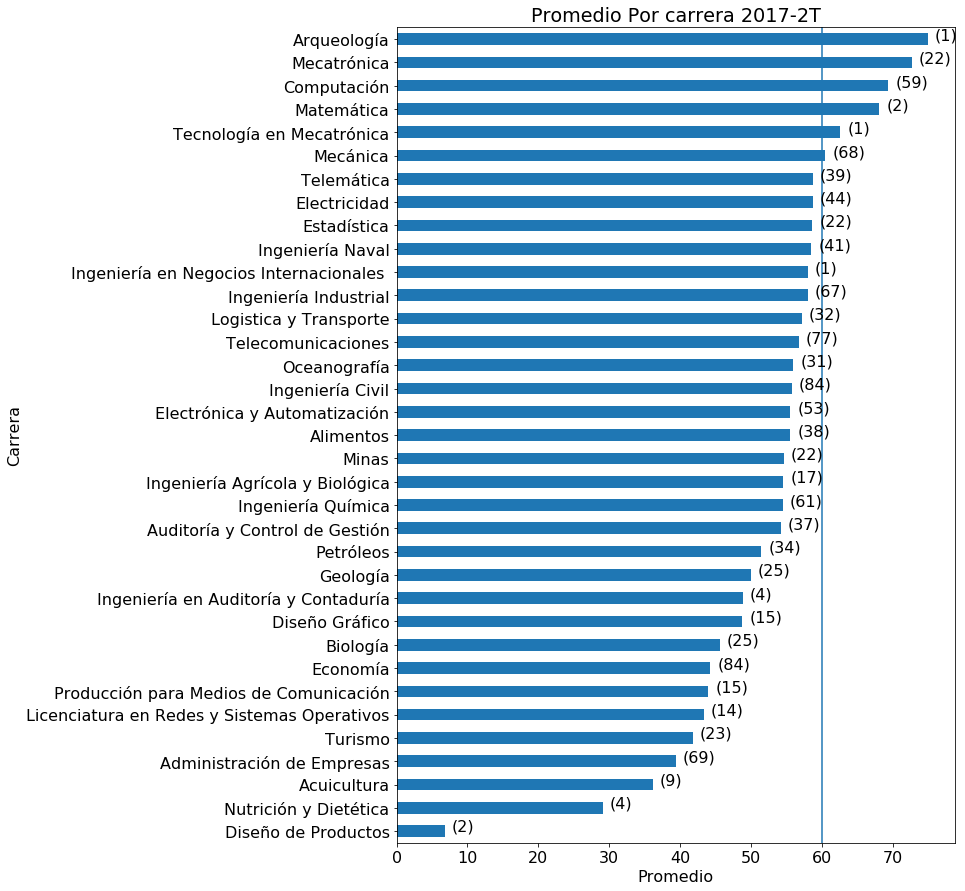

In [31]:
prom_carrera(df, semestre)

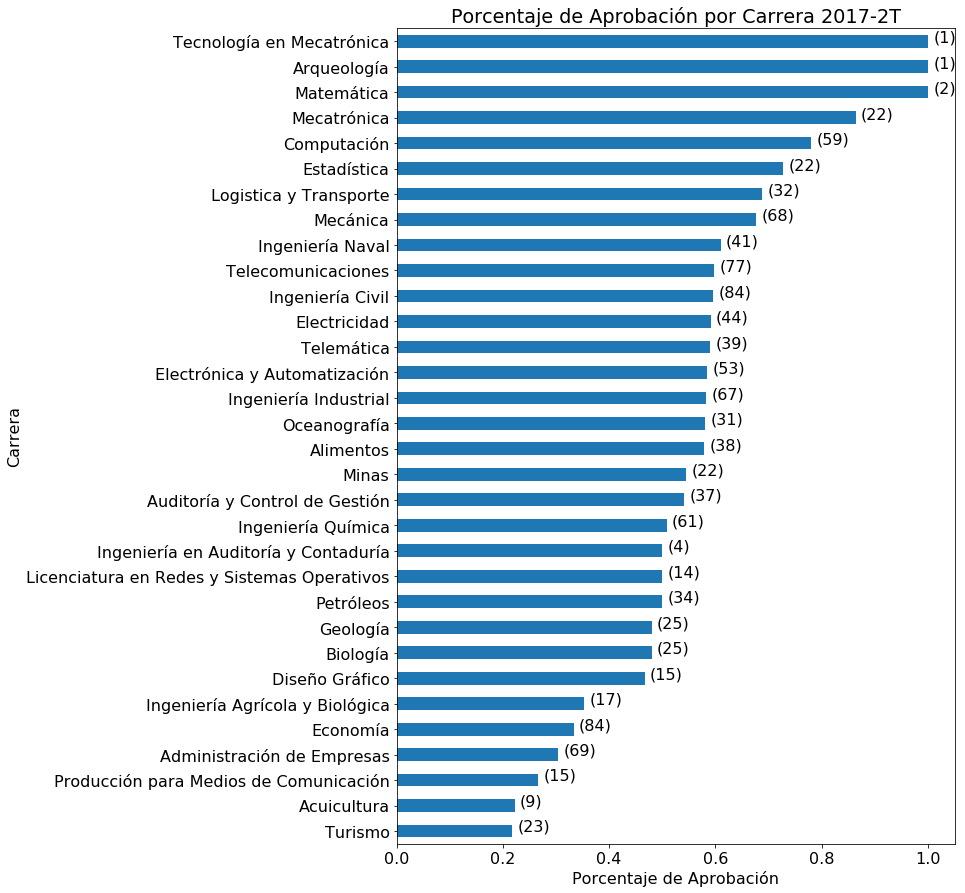

In [32]:
aprob_carrera(df, semestre)

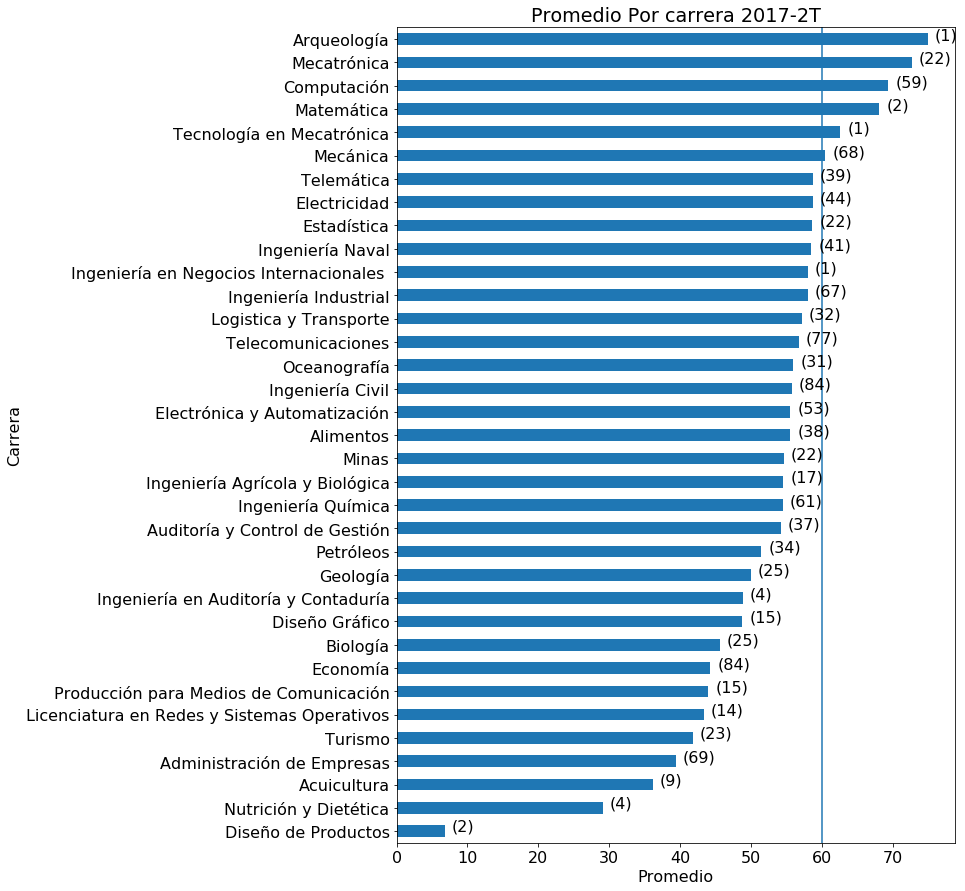

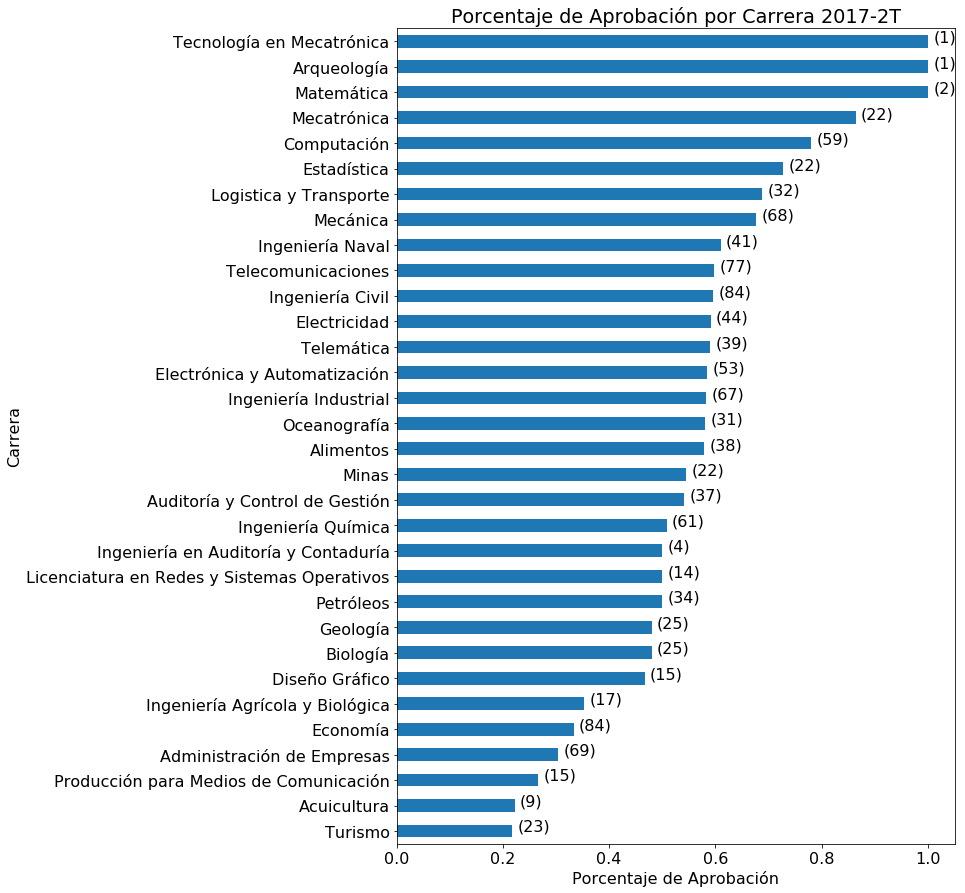

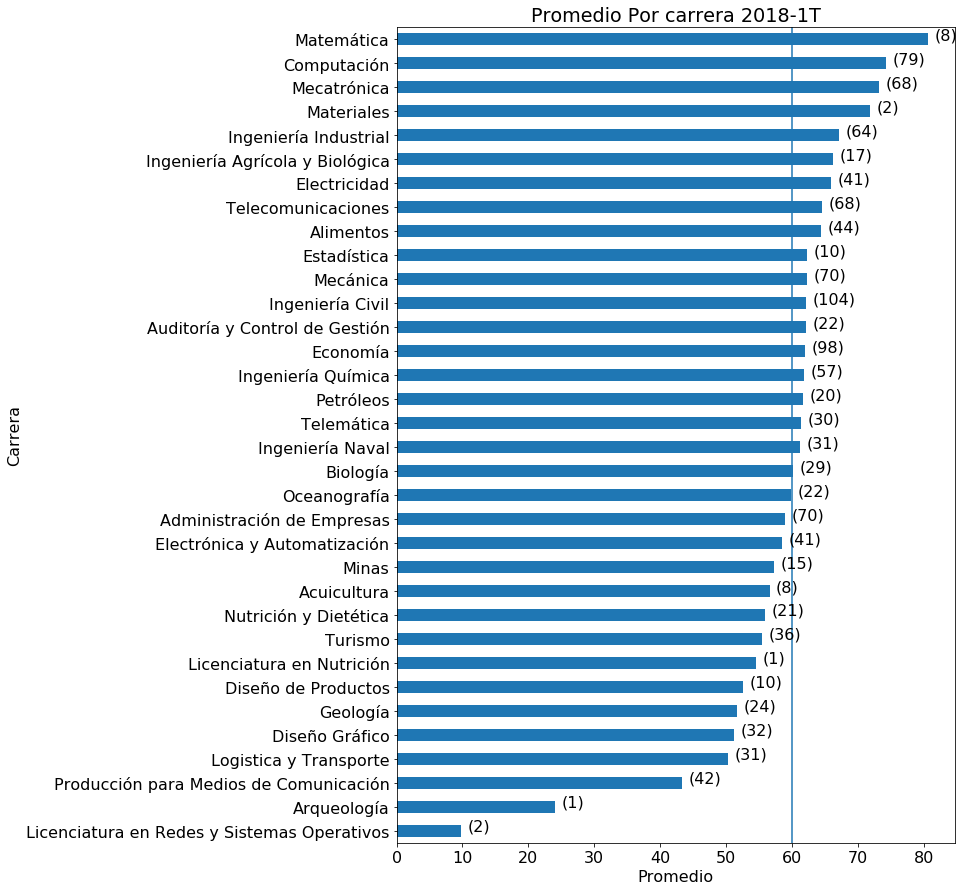

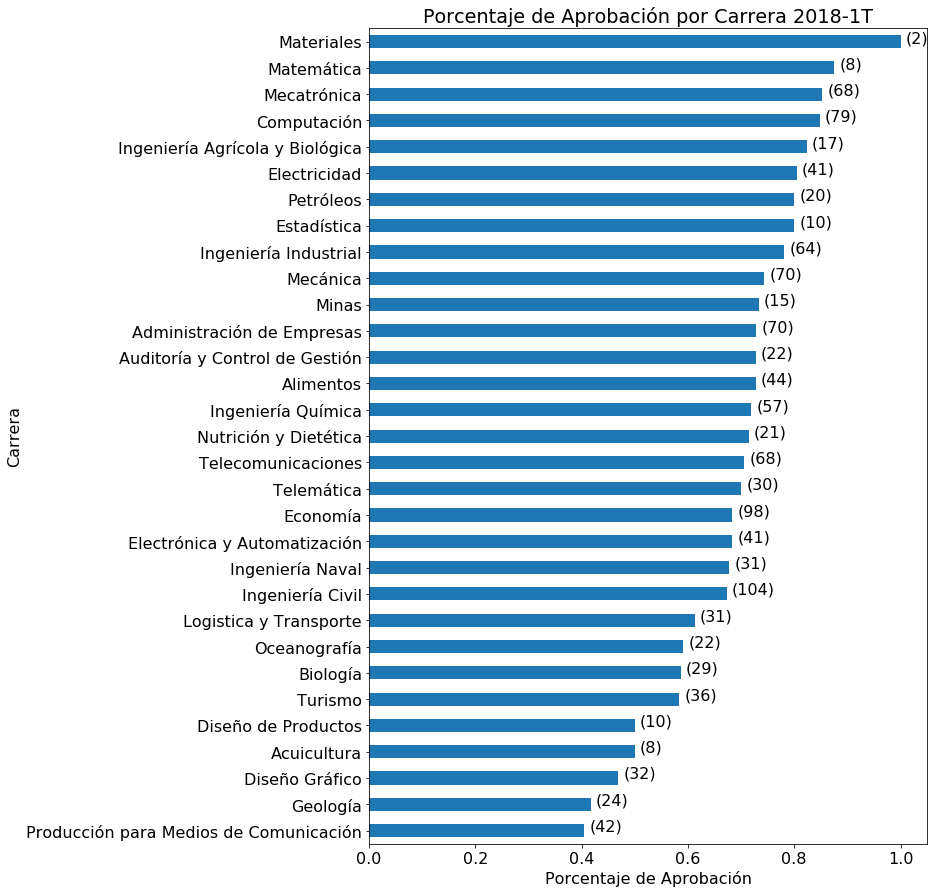

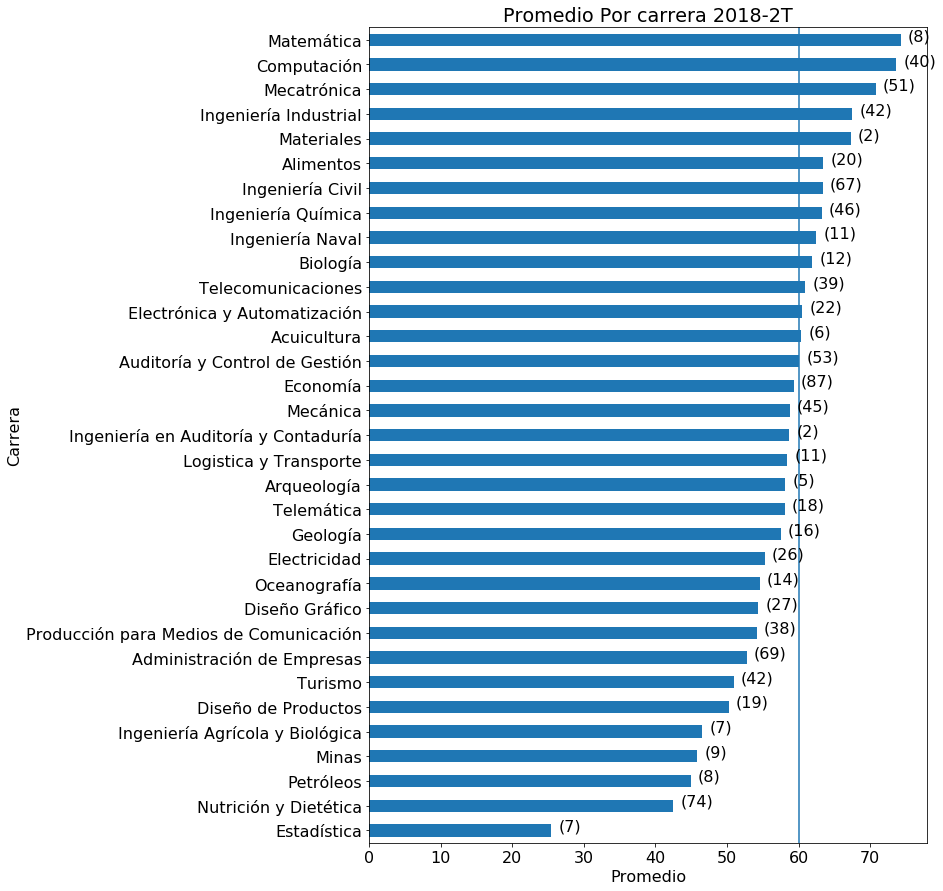

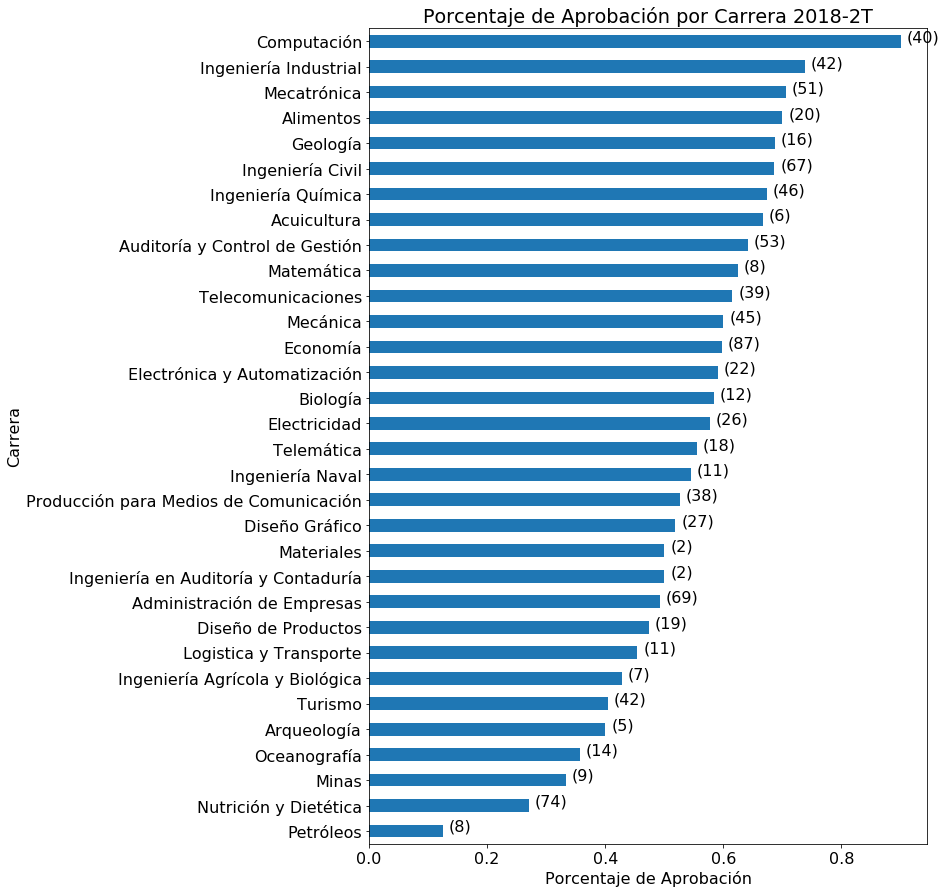

In [33]:
semestres = ("2017-2T", "2018-1T", "2018-2T")
for i,df in enumerate(dfs):
    semestre = semestres[i]
    prom_carrera(df, semestre)
    aprob_carrera(df, semestre)

In [36]:
df_2017 = pd.read_csv("modificados/2017-1T.csv", sep=";")

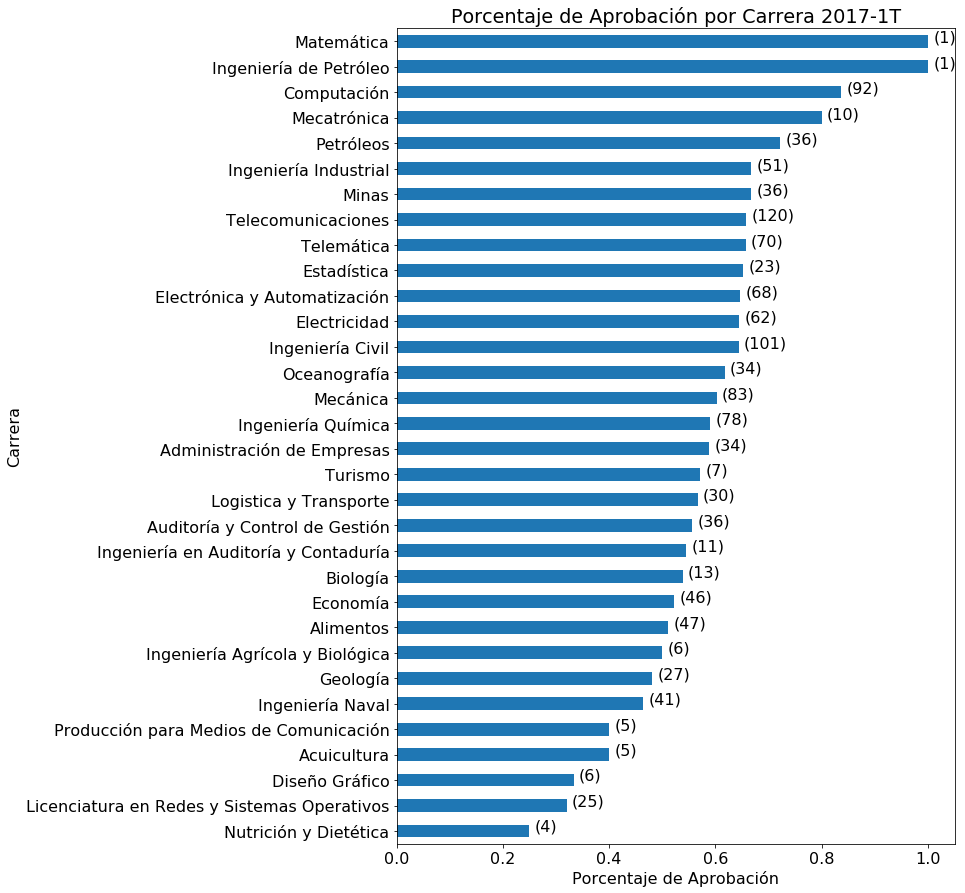

In [37]:
aprob_carrera(df_2017, "2017-1T")

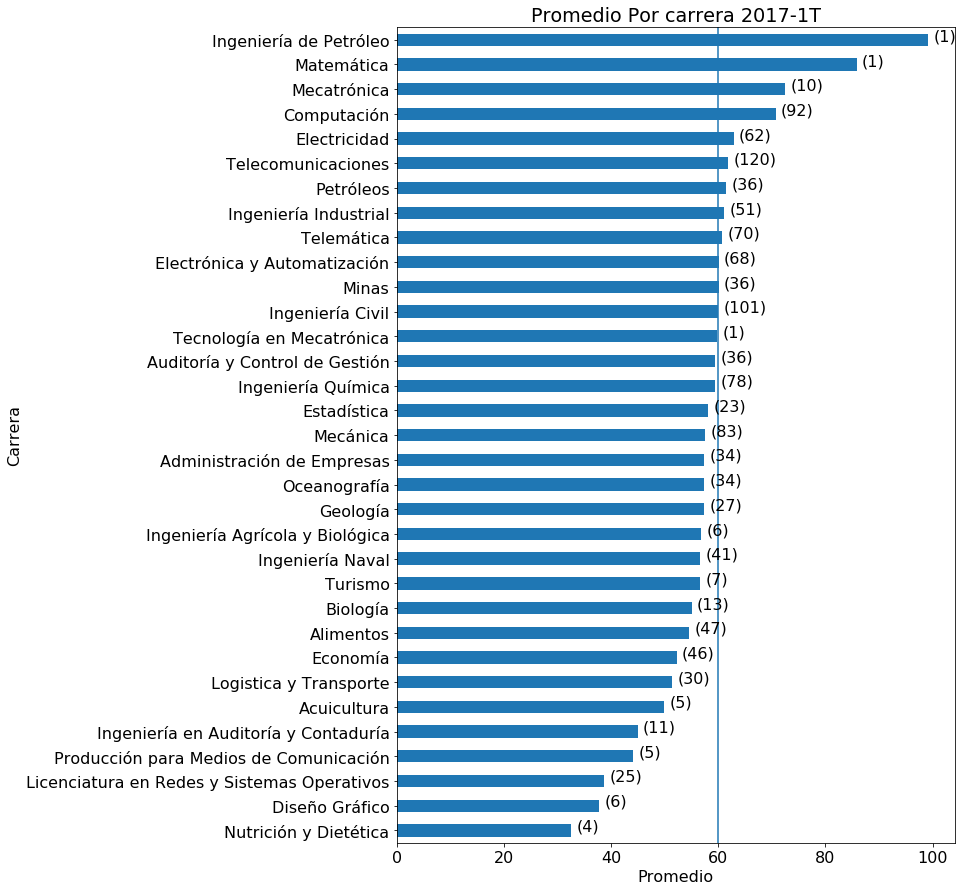

In [38]:
prom_carrera(df_2017, "2017-1T")

In [43]:
len(df_2017)
df_2017.AP.value_counts(normalize=True)

True     0.619008
False    0.380992
Name: AP, dtype: float64

In [42]:
for df in dfs:
    print(df.final.mean(), df.AP.value_counts(normalize=True))

54.310330308529956 True     0.542032
False    0.457968
Name: AP, dtype: float64
61.84285493827161 True     0.697044
False    0.302956
Name: AP, dtype: float64
58.26989183457053 True     0.569459
False    0.430541
Name: AP, dtype: float64
